In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import Required Libraries
_______

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

## Load and Prepare Data
_______

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

# Select features (X) and target variable (y)
X = data[['age', 'avg_glucose_level']]
y = data['stroke']

## Split Data into Training and Testing Sets
_______

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize and Train the Linear Regression Model
_______

In [4]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

##  Make Predictions
_______

In [5]:
# Predict the target variable on the test set
predictions = model.predict(X_test)

## Evaluate Mean Squared Error
_______

In [6]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.052635011714918675


## Evaluate Accuracy
_______

In [11]:
binary_predictions = (predictions >= 0.5).astype(int)
# Calculate Accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


## Visualization 
_______

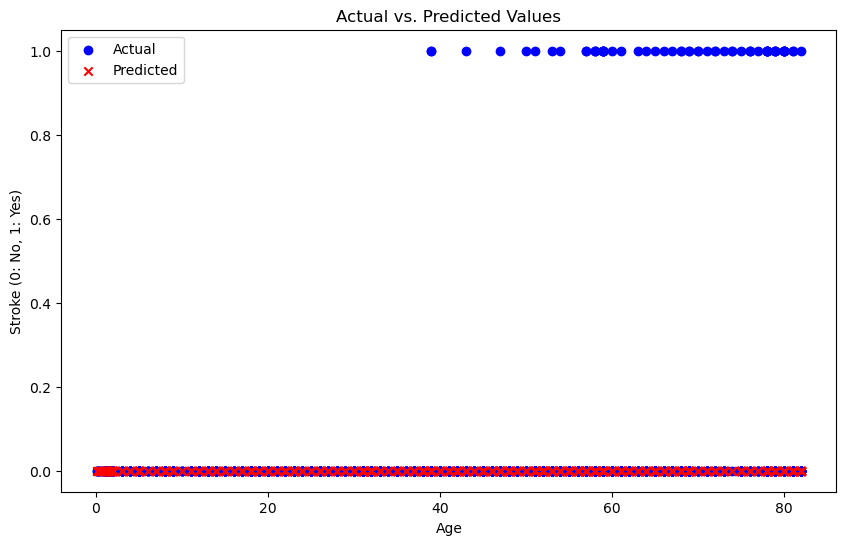

In [15]:
# Visualize the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test['age'], y_test, color='blue', label='Actual')
plt.scatter(X_test['age'], binary_predictions, color='red', marker='x', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Stroke (0: No, 1: Yes)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## Print Model Coefficients
_______

In [7]:
# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.00204278 0.00031739]
Intercept: -0.07650390012918193


The coefficients (model.coef_) represent the weights assigned to each feature in the linear regression equation, indicating the contribution of each feature to the target variable. The intercept (model.intercept_) is the value of the predicted target when all features are zero.


Linear regression might not be the best model for predicting binary outcomes like stroke (0 or 1). For binary classification tasks, we might want to consider logistic regression or other classification algorithms instead.